# Project: Wrangling and Analyze Data (WeRateDogs Twitter Data Analysis)

## INTRODUCTION
### DATA DESCRIPTION

> This datasets contains the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.
  WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.
  These ratings almost always have a denominator of 10. Almost all the numerators are always greater than 10.
  For example, 11/10, 12/10, 13/10, etc. The numerator are mostly bigger Because "they're good dogs Brent." 
  WeRateDogs has over 4 million followers and has received international media coverage. 
  This unique rating system is a big part of the popularity of WeRateDogs. The dataset used was gathered from three diffrent     sources in order to have enough information about the ratings.

### QUESTION(S) FOR ANALYSIS 

- How is the source of tweets shared?
- Which Dog Stage had the most likes?
- Which Dog Stage had the most Retweets?
- Is there any correlation between Retweet_count (retweets) and Favourite_count (likes)?
- Are tweets from an Iphone likely to gather more likes?

In [1]:
# Importing relevant packages

import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
import os
from timeit import default_timer as timer
pd.set_option('display.max_colwidth', -1)

In [2]:
# Getting the twitter achive data in csv format

df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# importing request libary and storing the url in a varaible

import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Getting the image predictions dataset

df_2 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### Note to my code reviewer: I had mobile verification issues so the following happened: 

# Twitter API code was sent to me from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [5]:
# Creating an empty list

df_3_list = []
# Opening and Reading text file

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        
        # Getting the requred columns
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending each to the list
        df_3_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})

In [6]:
# Converting to pandas data frame


df_3 = pd.DataFrame(df_3_list, columns=["tweet_id",'retweet_count', 'favorite_count'])

### Assessing all the datasets

### Visual Assessment

In [7]:
# Assessing df_1 (Twitter achieve data)

df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
# Assessing df_2 (Image predictions data)

df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
# Assessing df_3 (Tweet data)

df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [10]:
# Checking five random entries from df_1(Twitter archive data)

df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
969,750132105863102464,NaN,NaN,2016-07-05 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750132105863102464/photo/1,11,10,Stewie,None,None,None,None
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855871037440/photo/1,11,10,None,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a rare Arctic Wubberfloof. Unamused by the happenings. No longer has the appetites. 12/10 would totally hug https://t.co/krvbacIX0N,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1,https://twitter.com/dog_rates/status/692187005137076224/photo/1",12,10,a,None,None,None,None
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14,10,Sunny,doggo,None,None,None


In [11]:
# Getting information about each column

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Computing descriptive statistics of df_1 (Twitter archive dataset)

df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Checking the last five samples of df_1 (Twitter archive dataset)

df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [14]:
#Checking the value counts of the source column in df_1 (Twitter archive dataset) 

df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [15]:
#Checking if there are duplicate rows

sum(df_1.duplicated())


0

In [16]:
# Checking for unique values of each column 

df_1.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [17]:
# Checking for the value_counts of the rating numerator feature

df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [18]:

# Checking for the value_counts of the rating denominator feature

df_1.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [19]:
# Checking five ramdom sample entries from df_2(Image predictions)

df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1316,755110668769038337,https://pbs.twimg.com/ext_tw_video_thumb/755110610942169088/pu/img/3-INz45pSRMkzOEF.jpg,1,Labrador_retriever,0.708974,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True
1787,829501995190984704,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,1,French_bulldog,0.950851,True,Pekinese,0.015200,True,pug,0.011094,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True
1093,719704490224398336,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False


In [20]:
# Checking the information about each column

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Checking 5 random samples from df_3 (Tweet data)

df_3.sample(5)

,tweet_id,retweet_count,favorite_count
1962,673350198937153538,229,784
2247,667861340749471744,86,253
1891,674752233200820224,516,1580
1949,673686845050527744,479,1544
1464,694342028726001664,557,1727


In [22]:
# Checking information about each column

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
#### Below are the quality issues I have observed in the above dataset

- Irrelevant column: Retweet status Id

- Rows with invalid denominator

- Source column is a combination of url and text (only text is needed)

- Incorrect dog names in name column

- Irrelevant column: img_num

- Missing values in the following columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns

-  Redundacy in text column

- Incorrect data types in the following colums:  tweet_id, timestamp, dog_stage, p1_dog, p2_dog and p3_dog.


### Tidiness issues
- Dog_stage in Twitter Archive table(df_1) is in 4 columns instead of 1.

- Twitter archive data (df_1), image Predictions data(df_2), and Tweets data (df_3) should be a single dataframe

## Cleaning Data

> Now that I have listed all the quality and tideness issues. I will go ahead to carry out suitable cleaning for each issues, so the data will be of high quality before proceeding to analyzing and generating insight.


In [23]:
# Making copies of original pieces of data

df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

### Issue 1: Irrelevant coulmn: Retweet status ID

#### What to do :  Drop the rewteet status id, because the information is not needeed

In [24]:
# Filtering the rows to get only rows where retweets is null

df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]

#### Test (To see if my cleaning actually worked)

In [25]:
df_1_clean.retweeted_status_id.notnull().sum()

0

In [26]:
df_1_clean.retweeted_status_user_id.notnull().sum()

0

In [27]:
df_1_clean.retweeted_status_timestamp .notnull().sum()

0

> There are no rows where retweeted_status_id is not null, which means there are only tweets in the dataframe

### Issue 2: Rows with invalid denominator (I.e. denominator is not equal to 10)

### What to do: Drop rows where rating_denominator is not 10 (the rows to be dropped are 23 as shown above, the number rows to be drop are relatively very small to the total number of rows)

In [28]:
# Getting the count of rows where denominator is not equal to 10

len(df_1.rating_denominator[df_1.rating_denominator != 10])

23

In [29]:
# Filter to get only rows where rating_denominator is equal to 10

df_1_clean= df_1[df_1['rating_denominator'] == 10]

### Test (To see if my cleaning actually worked)

In [30]:
 len(df_1_clean.rating_denominator[df_1.rating_denominator != 10])

0

In [31]:
df_1_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

> All the denominator is equal to 10

### Issue 3: Source column is a combination of url and text (I.e. href), only text is needed

### What to do: Extract source text from source column in twitter achive data(df_1_clean)

In [32]:
# Getting the unique values in source column

df_1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [33]:
# Replacing the source with only the text component

df_1_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df_1_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
df_1_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df_1_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Test (To see if my cleaning actually worked)

In [34]:
df_1_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

> All the source text has been extracted from the source column in df_1 (Twitter archive data) 

### Issue 4: Incorrect dog names in name column  

### What to do: Remove rows where dog names are not real (I.e. the dog names are in lower case)

In [35]:
# Using Regex(Regular expressions) to get the list of all names that are lowercase 

names_lower = df_1_clean.name.str.contains('^[a-z]', regex = True)
df_1_clean[names_lower].name.value_counts().sort_index()

a               54
actually        2 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [36]:
# Checking count of number of rows where name is in lowercase

len(df_1_clean[names_lower].name)

106

In [37]:
# Filtering to et only rows where name contains with upper case letter

df_1_clean = df_1_clean[df_1_clean['name'].str.contains('^[A-Z]+')]

### Test (To see if my cleaning actually worked)

In [38]:
df_1_clean[names_lower].name.value_counts().sort_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Series([], Name: name, dtype: int64)

In [39]:
len(df_1_clean[names_lower].name)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

> All the dog names with lower case have been removed

### Issue 5: Irrelevant column: img_ng (This column represents the image number in predictions dataframe)

### What to do:  Drop the img_num column in df_2_clean, It's not needed for analyzing

In [40]:
# dropping the img_num coulmn 

df_2_clean.drop('img_num', axis=1, inplace=True)

### Test (To see if my cleaning worked)

In [41]:
df_2_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [42]:
df_2_clean.head(0)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


> The img_num column has been droped from df_2_clean

### Issue 6: .Missing values in the following columns:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns

### What to do: Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls (they contain missing values and they won't be needed for analyis)

In [43]:
# Dropping the above mentioned columns

df_1_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], 
                          axis=1, inplace=True)

### Test (To see if my cleaning actually worked)

In [44]:
df_1_clean.shape

(2227, 11)

In [45]:
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [46]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2227 non-null int64
timestamp             2227 non-null object
source                2227 non-null object
text                  2227 non-null object
rating_numerator      2227 non-null int64
rating_denominator    2227 non-null int64
name                  2227 non-null object
doggo                 2227 non-null object
floofer               2227 non-null object
pupper                2227 non-null object
puppo                 2227 non-null object
dtypes: int64(3), object(8)
memory usage: 208.8+ KB


 > The following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns have been dropped

### Issue 7: Dog_stage in Twitter Archive table(df_1) is in 4 columns instead of 1.

### What to do: Combine doggo, floofer, pupper, and puppo columns into a single column called 'dog_stage', using lambda, Then drop the columns

In [47]:
# Replacing none in the respective columns with no space

df_1_clean['doggo'].replace("None",  "", inplace=True)
df_1_clean['floofer'].replace("None", "", inplace=True)
df_1_clean['pupper'].replace("None", "", inplace=True)
df_1_clean['puppo'].replace("None", "", inplace=True)

In [48]:
# Using lambda to combine the columns

df_1_clean['dog_stage'] = df_1_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

In [49]:
# checking thier value counts

df_1_clean.dog_stage.value_counts()

                1863
pupper          233 
doggo           81  
puppo           29  
doggopupper     10  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stage, dtype: int64

> Some stages are more than one and cramped up, so I need to do some editing

In [50]:
# Separating rows that meet certain conditions with a comma

df_1_clean['dog_stage'].mask(df_1_clean['dog_stage'] == 'doggopupper', 'doggo,pupper', inplace=True)
df_1_clean['dog_stage'].mask(df_1_clean['dog_stage'] == 'doggofloofer', 'doggo,floofer ', inplace=True) 
df_1_clean['dog_stage'].mask(df_1_clean['dog_stage'] == 'doggopuppo', 'doggo,puppo', inplace=True) 

In [51]:
# Replacing empty spaces with None in the dog_stage column

df_1_clean['dog_stage'] = df_1_clean['dog_stage'].replace('', 'None')

In [52]:
# Dropping the columns

df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test (To see if my cleaning worked)

In [53]:
df_1_clean.dog_stage.value_counts()

None              1863
pupper            233 
doggo             81  
puppo             29  
doggo,pupper      10  
floofer           9   
doggo,puppo       1   
doggo,floofer     1   
Name: dog_stage, dtype: int64

In [54]:
# checking if doggo, floofer, pupper and puppo columns have been successfully dropped
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [151]:
# Checking the head of df_1_clean

df_1_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None


> All the dog stage columns have been combined as one

### Issue 8: Twitter archive data (df_1), image Predictions data(df_2), and Tweets data (df_3) should be a single dataframe

### What to do: Combine Twitter archive data(df_1_clean), Image Predictions(df_2_clean), and Tweet data (df_3_clean)

In [55]:
# Checking the shape of df_1_clean
df_1_clean.shape

(2227, 8)

In [56]:
# Checking the shape of df_2_clean
df_2_clean.shape

(2075, 11)

In [57]:
# Checking the shape of df_3_clean
df_3_clean.shape

(2354, 3)

In [58]:
# performing inner join to get only tweets that appear in both dataframe

df_merged =df_1_clean.merge(df_3_clean, how='inner', on='tweet_id')

In [59]:
# Performing another inner join
df_merged2 =df_merged.merge(df_2_clean, how='inner', on='tweet_id')

### Test (To see if my cleaning actually worked)

In [60]:
# Checking the combined data

df_merged2

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,None,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [61]:
# Checking information of the merged data

df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 20 columns):
tweet_id              1958 non-null int64
timestamp             1958 non-null object
source                1958 non-null object
text                  1958 non-null object
rating_numerator      1958 non-null int64
rating_denominator    1958 non-null int64
name                  1958 non-null object
dog_stage             1958 non-null object
retweet_count         1958 non-null int64
favorite_count        1958 non-null int64
jpg_url               1958 non-null object
p1                    1958 non-null object
p1_conf               1958 non-null float64
p1_dog                1958 non-null bool
p2                    1958 non-null object
p2_conf               1958 non-null float64
p2_dog                1958 non-null bool
p3                    1958 non-null object
p3_conf               1958 non-null float64
p3_dog                1958 non-null bool
dtypes: bool(3), float64(3), int64(5), ob

> The three dataframes have been combined

### Issue 9: Redundancy in text column

### Drop the text column

In [62]:
# dropping the text column

df_merged2.drop(['text'], axis = 1, inplace=True)

### Test (To see if my cleaning code worked)

In [63]:
df_merged2.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

> The text column was dropped

### Issue 10: Incorrect data types in the following colums:  tweet_id, timestamp, dog_stage, p1_dog, p2_dog and p3_dog.

### What to do: Convert tweet_id to string, timestamp to datetime, dog_stage to categorical, p1_dog, p2_dog and p3_dog to categorical datatype.

In [64]:
# converting tweet_id to a string

df_merged2.tweet_id = df_merged2.tweet_id.astype(str)

In [65]:
# Converting timestamp to datetime data

df_merged2.timestamp = pd.to_datetime(df_merged2.timestamp)

In [66]:
#Converting dog_stage to a categorical data type

df_merged2.dog_stage = df_merged2.dog_stage.astype('category')

In [67]:
##Converting p1_dog to a categorical data type

df_merged2.p1_dog = df_merged2.p1_dog.astype('category')

In [68]:
##Converting p2_dog to a categorical data type

df_merged2.p2_dog = df_merged2.p2_dog.astype('category')

In [69]:
##Converting p3_dog to a categorical data type

df_merged2.p3_dog = df_merged2.p3_dog.astype('category')

### Test (To see if my cleaning code worked)

In [70]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 19 columns):
tweet_id              1958 non-null object
timestamp             1958 non-null datetime64[ns]
source                1958 non-null object
rating_numerator      1958 non-null int64
rating_denominator    1958 non-null int64
name                  1958 non-null object
dog_stage             1958 non-null category
retweet_count         1958 non-null int64
favorite_count        1958 non-null int64
jpg_url               1958 non-null object
p1                    1958 non-null object
p1_conf               1958 non-null float64
p1_dog                1958 non-null category
p2                    1958 non-null object
p2_conf               1958 non-null float64
p2_dog                1958 non-null category
p3                    1958 non-null object
p3_conf               1958 non-null float64
p3_dog                1958 non-null category
dtypes: category(4), datetime64[ns](1), float64(3), int64(4),

> All the incorrect data types have been converted to the correct ones

## Storing Data
Now, I am done with the data wrangling process so I will save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [71]:
# storing in a csv file called twitter_archive_master.csv

df_merged2.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
> In this section, I wil be analyzing and visualizing the data based on the analysisquestions mentioned above.

In [72]:
# Reading the cleaned data to a datframe

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [73]:
# Having an overview of the dataset

twitter_archive_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Q1: How is the source of tweet shared?

In [74]:
# Getting the value count for each tweet source

twitter_archive_master['source'].value_counts()

Twitter for iPhone    1921
Twitter Web Client    27  
TweetDeck             10  
Name: source, dtype: int64

Text(0.5,1,'Source of Tweet')

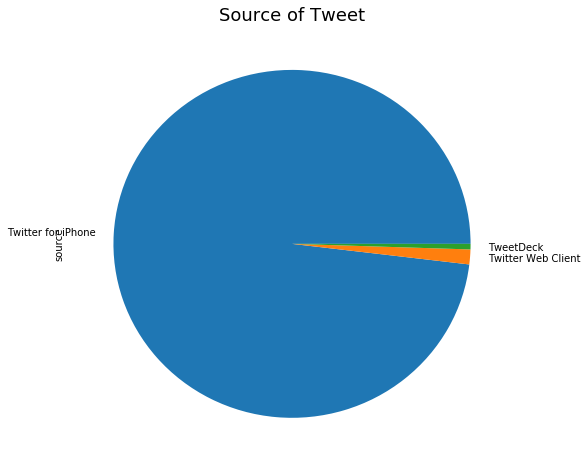

In [75]:
# Plotting a pie chart to display the value count of each source tweet

twitter_archive_master['source'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Source of Tweet', fontsize=18)

> From the above analysis and visual, most of the tweets were from an Iphone

## Q2 Which Dog Stage had the most likes?

In [76]:
# Grouping the dog stage column and checking which one has the highest likes

twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       47844.000000
puppo             20643.739130
doggo             18408.938462
doggo,floofer     17169.000000
floofer           13206.000000
doggo,pupper      11384.000000
None              8314.107208 
pupper            6890.363184 
Name: favorite_count, dtype: float64

In [77]:
# Assigning colors to the bar chart I want to plot

colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5,0,'Dog_Stage')

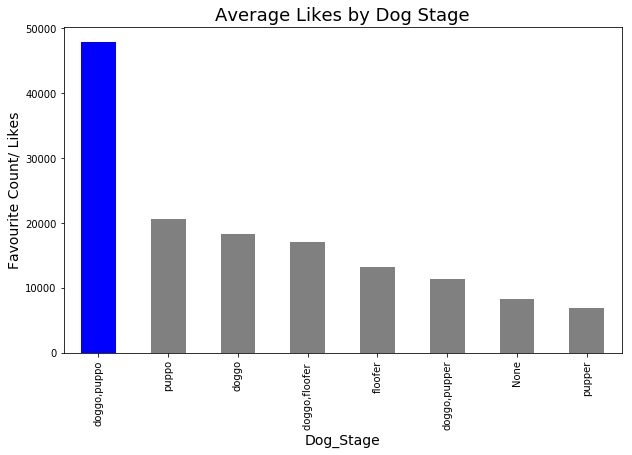

In [78]:
# Plotting a bar chart for the average likes

twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average Likes by Dog Stage', fontsize=18)
plt.ylabel('Favourite Count/ Likes', fontsize=14)
plt.xlabel('Dog_Stage', fontsize=14)

> From the above analysis and visualization, It can be deduced that doggo, puppo received the most number of likes.
The top three stages are:
- Doggo,Puppo
- Puppo
- Doggo

### Q3:  Which Dog Stage accrued the most Retweets?

In [79]:
# Getting the retweet count for each dog stage and sorting them in ascending order.

twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       19196.000000
doggo             8026.953846 
puppo             6431.434783 
doggo,pupper      5650.222222 
floofer           4968.714286 
doggo,floofer     3433.000000 
None              2805.565112 
pupper            2453.641791 
Name: retweet_count, dtype: float64

In [80]:
# Giving a color to the bar chart I want to plot

colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5,0,'Dog_stage')

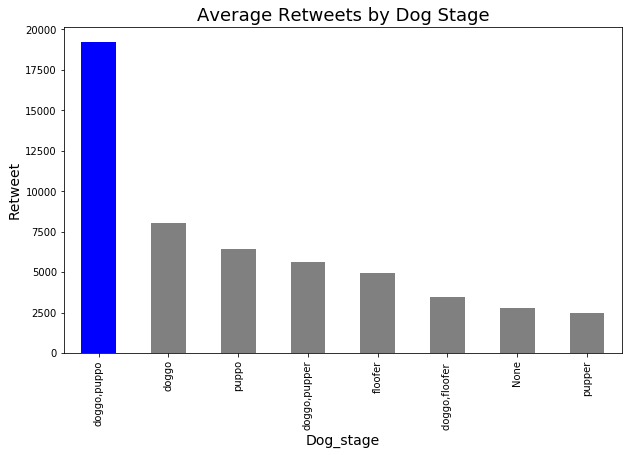

In [81]:
# Plotting a bar chart for the rewteeet counts

twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average Retweets by Dog Stage', fontsize=18)
plt.ylabel('Retweet', fontsize=14)
plt.xlabel('Dog_stage', fontsize=14)

> From the above statictics and plot, 'doggopuppo' dog stage has the most retweeet count

### Q4: Is there any correlation between Retweet_count (retweets) and Favourite_count (likes)?

Text(0,0.5,'LIkes')

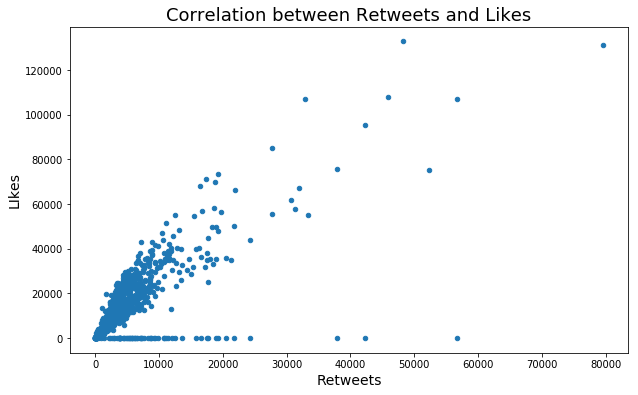

In [82]:
# Plotting a scatter plot for retweet_count and favourite_count

twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(10,6))
plt.title('Correlation between Retweets and Likes', fontsize=18)
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('LIkes', fontsize=14)

In [83]:
# Importing scipy so I can get the pearson correlation co-efficient

from scipy.stats import pearsonr

In [84]:
# Getting the pearson correlation co-efficient

pearsonr(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)

(0.78623147599775478, 0.0)

> from the above plot and statistics , r is aprroximately 0.79, this implies there is a strong correlation between retweet and favourite count. 
This means tweets that are liked would most likely be retweeted.

### Q5: Are tweets tweeted from an Iphone likely to gather more likes?

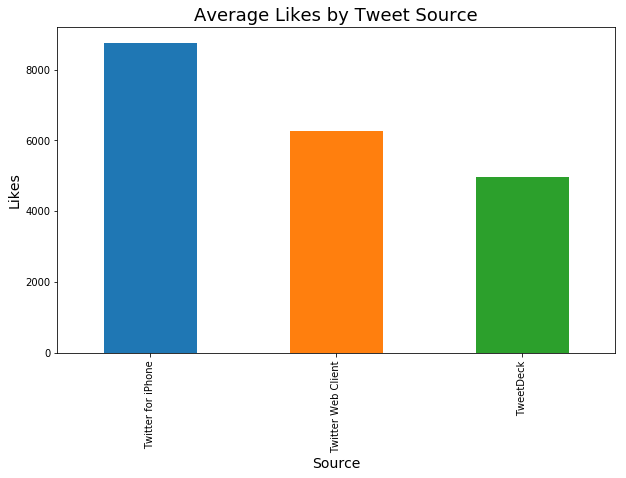

In [85]:
# Plotting a bar chart for tweets from different sources.

twitter_archive_master.groupby('source')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Average Likes by Tweet Source', fontsize=18)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Likes', fontsize=14)
plt.figsize=(10,6)

> From the above chart, tweets from an Iphone had the most likes. This could mean that tweets from an Iphone would most likely get a like. However, there could be other factors to this.